In [31]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [32]:
df = pd.read_csv('31389400-Telco-Customer-Churn.csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [33]:
df.shape

(7032, 21)

## Part1 : Quick Data Check ##

Task: Confirm with info(). method, The datatypes and non-null values in your dataframe

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7032 entries, 0 to 7031
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7032 non-null   object 
 1   gender            7032 non-null   object 
 2   SeniorCitizen     7032 non-null   int64  
 3   Partner           7032 non-null   object 
 4   Dependents        7032 non-null   object 
 5   tenure            7032 non-null   int64  
 6   PhoneService      7032 non-null   object 
 7   MultipleLines     7032 non-null   object 
 8   InternetService   7032 non-null   object 
 9   OnlineSecurity    7032 non-null   object 
 10  OnlineBackup      7032 non-null   object 
 11  DeviceProtection  7032 non-null   object 
 12  TechSupport       7032 non-null   object 
 13  StreamingTV       7032 non-null   object 
 14  StreamingMovies   7032 non-null   object 
 15  Contract          7032 non-null   object 
 16  PaperlessBilling  7032 non-null   object 


Task: Get a quick statistical summary of the neumaric columns with describe(), ypu should notice taht many columns are categorical, meaning you will eventuvally need to convert them to dummy variables.

In [35]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7032.000000,7032.000000,7032.000000,7032.000000
mean,0.162400,32.421786,64.798208,2283.300441
std,0.368844,24.545260,30.085974,2266.771362
min,0.000000,1.000000,18.250000,18.800000
25%,0.000000,9.000000,35.587500,401.450000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.862500,3794.737500
max,1.000000,72.000000,118.750000,8684.800000


## Part 2 : Exploratory Data Analysis ##

Task: Confirm taht there are no null values by displaying NaN values per feature column

In [36]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

Task: Display the balance of the class labels(churn) with a count plot.

<AxesSubplot:xlabel='Churn', ylabel='count'>

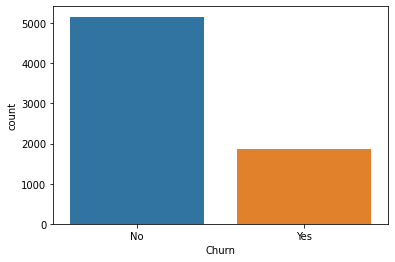

In [37]:
sns.countplot(data = df, x = 'Churn')

Task: Explore the distribution of TotalCharges between churn categories with a box plot or violin plot.

<AxesSubplot:xlabel='Churn', ylabel='TotalCharges'>

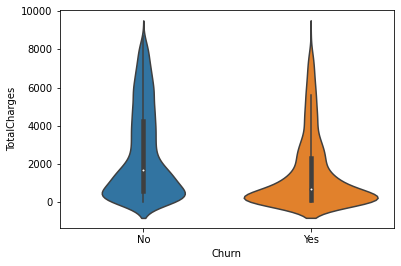

In [38]:
sns.violinplot(data = df, x = 'Churn', y = 'TotalCharges')

Task: Create a boxplot showing the distribution of TotalCharges per contract type, also add in a hue coloring on the churn class.

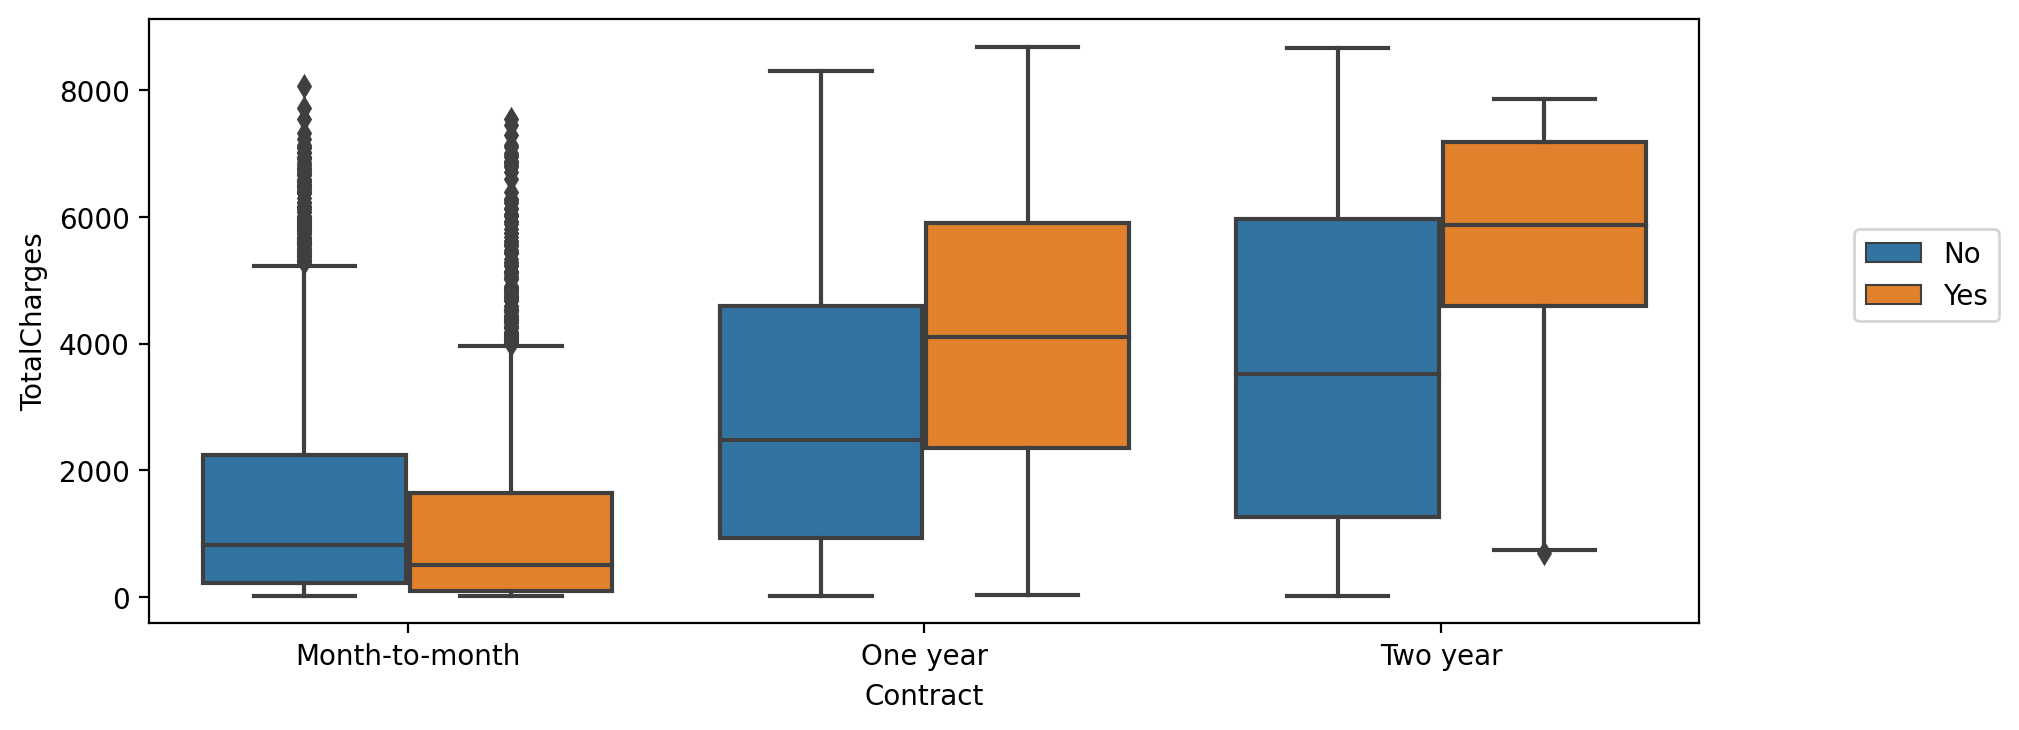

In [39]:
plt.figure(figsize = (10,4), dpi = 200)
sns.boxplot(data = df, y = 'TotalCharges', x = 'Contract', hue = 'Churn')
plt.legend(loc = (1.1, 0.5))

Task: Create a bar plot showing the correlation of the following features to the class. Keep in mind, for the categorical features, you will need to convert them into dummy variables first, as you can only calculate correlation for neumeric features.

In [40]:
corr_df = pd.get_dummies(df[['gender', 'SeniorCitizen', 'Partner',
                  'Dependents','PhoneService', 'MultipleLines',
                  'OnlineBackup', 'OnlineSecurity','DeviceProtection',
                   'TechSupport','InternetService', 'StreamingMovies', 'StreamingTV',
                   'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn']]).corr()

In [67]:
# corr_df

In [41]:
corr_yes_churn = corr_df['Churn_Yes'].sort_values().iloc[1:-1]

In [68]:
# corr_yes_churn

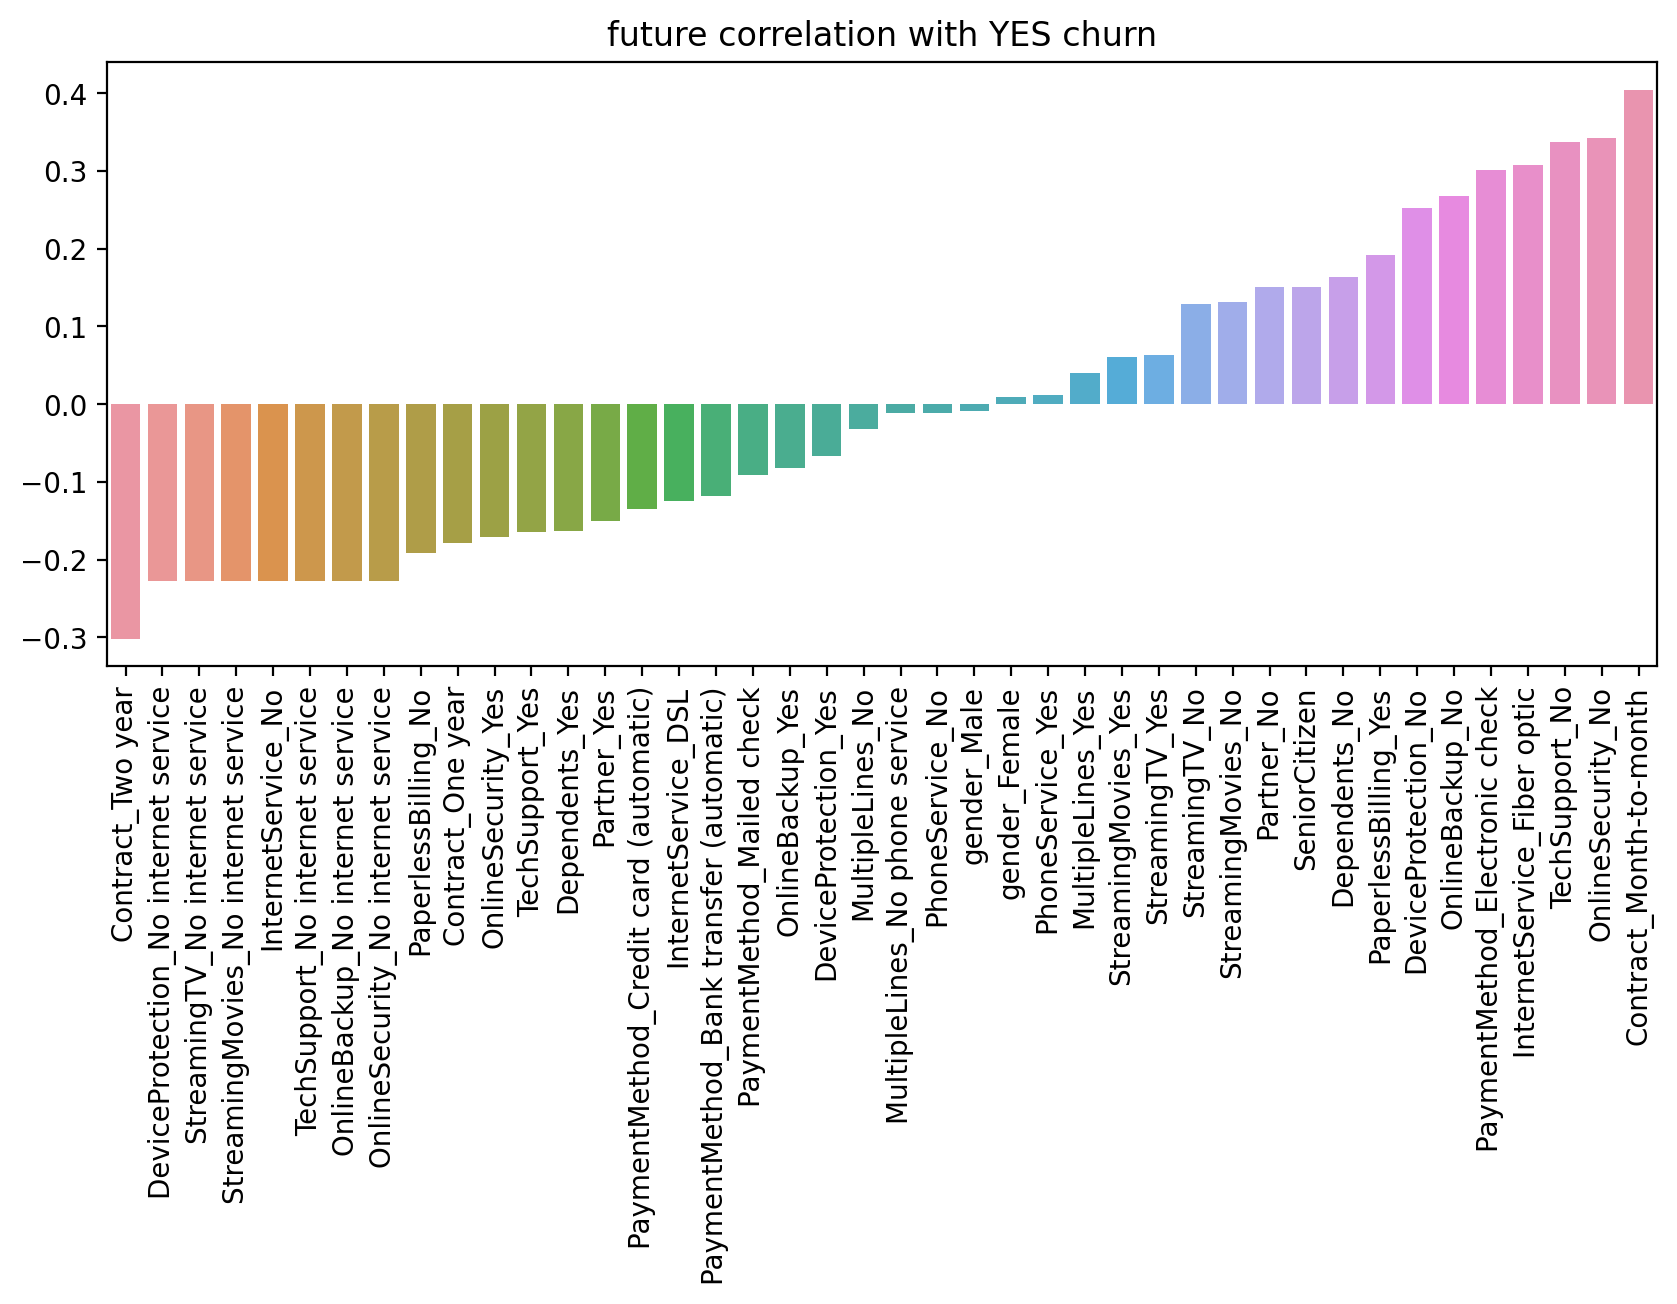

In [42]:
plt.figure(figsize = (10, 4), dpi = 200)
plt.title('future correlation with YES churn')
sns.barplot(x = corr_yes_churn.index, y = corr_yes_churn.values)
plt.xticks(rotation = 90);

## Part 3: Churn Analysis ##

Task: What are the 3 contract types available? 

In [43]:
df['Contract'].unique()

array(['Month-to-month', 'One year', 'Two year'], dtype=object)

Task: Create a histogram displaying the distribution of tenure column, which is the amount of months a customer was or has been on a customer

In [44]:
df['tenure'].unique()

array([ 1, 34,  2, 45,  8, 22, 10, 28, 62, 13, 16, 58, 49, 25, 69, 52, 71,
       21, 12, 30, 47, 72, 17, 27,  5, 46, 11, 70, 63, 43, 15, 60, 18, 66,
        9,  3, 31, 50, 64, 56,  7, 42, 35, 48, 29, 65, 38, 68, 32, 55, 37,
       36, 41,  6,  4, 33, 67, 23, 57, 61, 14, 20, 53, 40, 59, 24, 44, 19,
       54, 51, 26, 39], dtype=int64)

<AxesSubplot:xlabel='tenure', ylabel='Count'>

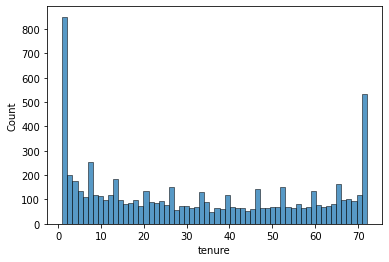

In [45]:
sns.histplot(data = df, x = 'tenure', bins = 60)

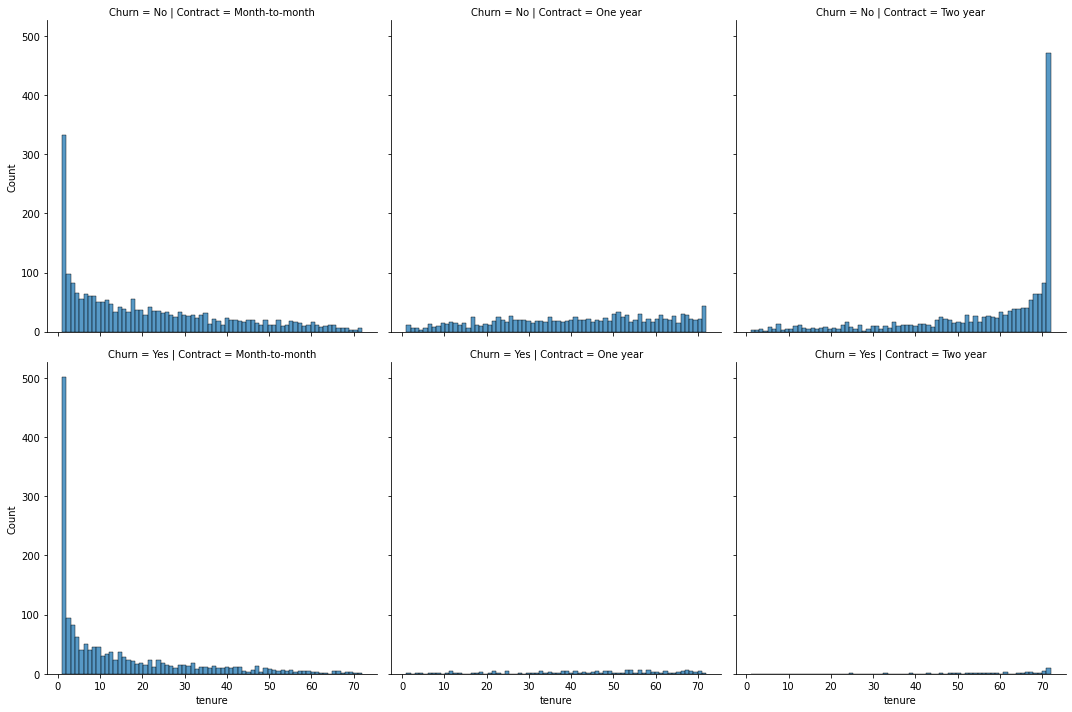

In [46]:
sns.displot(data = df, x= 'tenure', bins = 70, col = 'Contract', row = 'Churn')

Task: Display a scatter plot of Total Charges versus Monthly Charges and color hue by churn

<AxesSubplot:xlabel='MonthlyCharges', ylabel='TotalCharges'>

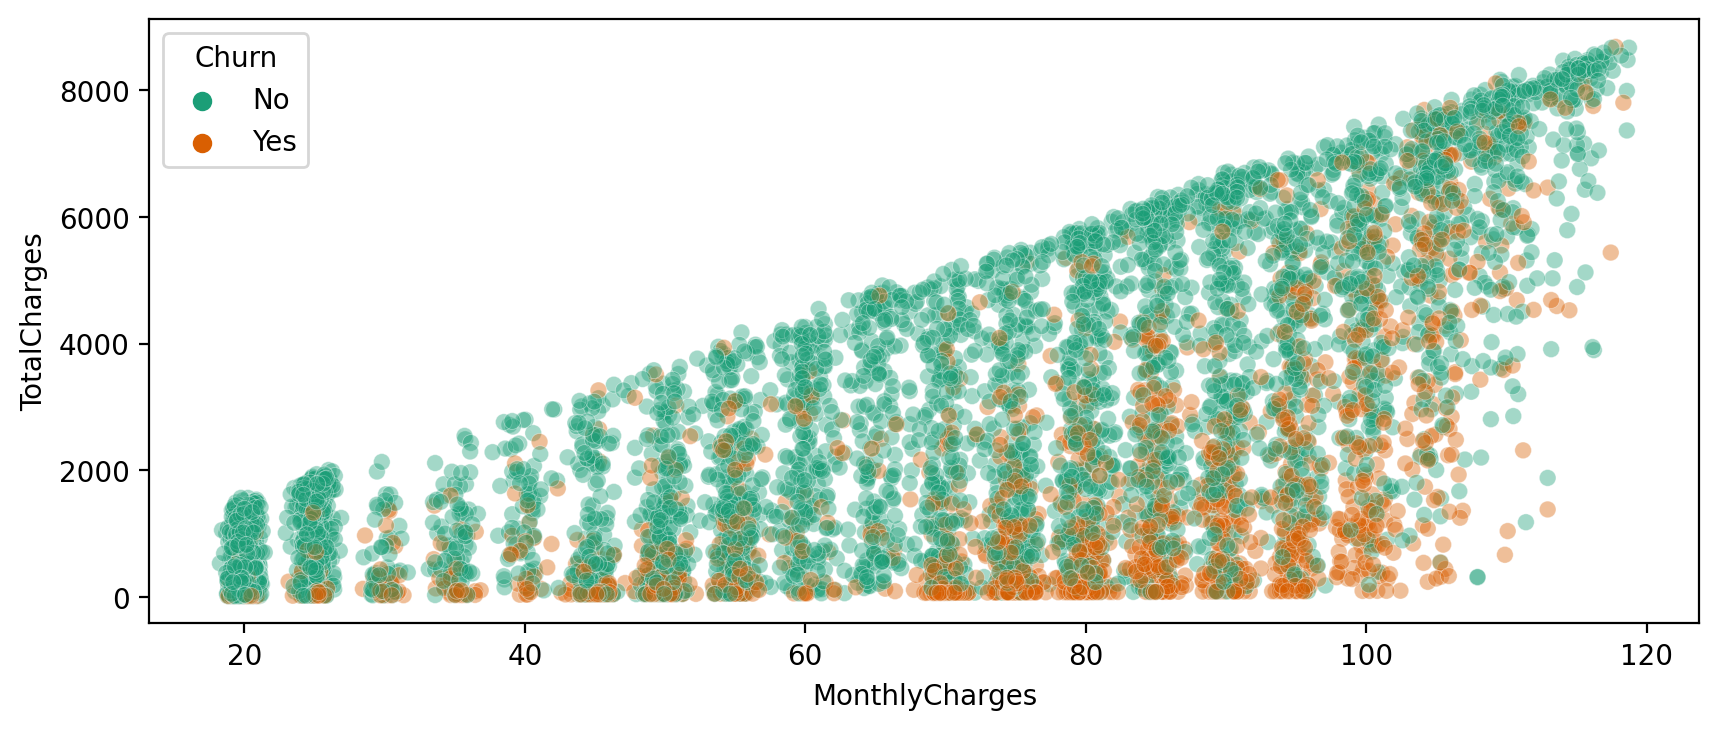

In [47]:
plt.figure(figsize = (10, 4), dpi = 200)
sns.scatterplot(data = df, x = 'MonthlyCharges', y = 'TotalCharges', hue = 'Churn', alpha = 0.4, linewidth = 0.3, palette = 'Dark2')

In [48]:
yes_churn = df.groupby(['Churn', 'tenure']).count().transpose()['Yes']

In [49]:
no_churn = df.groupby(['Churn', 'tenure']).count().transpose()['No']

In [70]:
# no_churn

In [51]:
churn_rate = (100 * yes_churn) / (no_churn + yes_churn)

In [52]:
churn_rate.transpose()['customerID']

tenure
1     61.990212
2     51.680672
3     47.000000
4     47.159091
5     48.120301
        ...    
68     9.000000
69     8.421053
70     9.243697
71     3.529412
72     1.657459
Name: customerID, Length: 72, dtype: float64

<AxesSubplot:xlabel='tenure'>

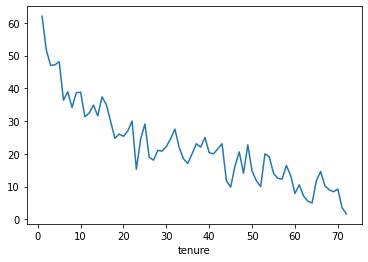

In [53]:
churn_rate.transpose()['customerID'].plot()

### Broader Cohort Groups ###

Task: Based on the tenure column values, create a new column called tenure cohort that creates 4 separate categories

In [54]:
def cohort(tenure):
    if tenure < 13:
        return '0 - 12 Months'
    elif tenure < 25:
        return '12 - 24 Months'
    elif tenure < 49:
        return '24 - 48 Months'
    else:
        return 'Over 48 Months'

In [55]:
df['Tenure Cohort'] = df['tenure'].apply(cohort)

In [56]:
df[['Tenure Cohort', 'tenure']]

,Tenure Cohort,tenure
0,0 - 12 Months,1
1,24 - 48 Months,34
2,0 - 12 Months,2
3,24 - 48 Months,45
4,0 - 12 Months,2
...,...,...
7027,12 - 24 Months,24
7028,Over 48 Months,72
7029,0 - 12 Months,11
7030,0 - 12 Months,4


Task: Create a scatter plot of Total Charges versus Monthly Charges, charts colored by tenure cohort defined in the previsious task.

<AxesSubplot:xlabel='MonthlyCharges', ylabel='TotalCharges'>

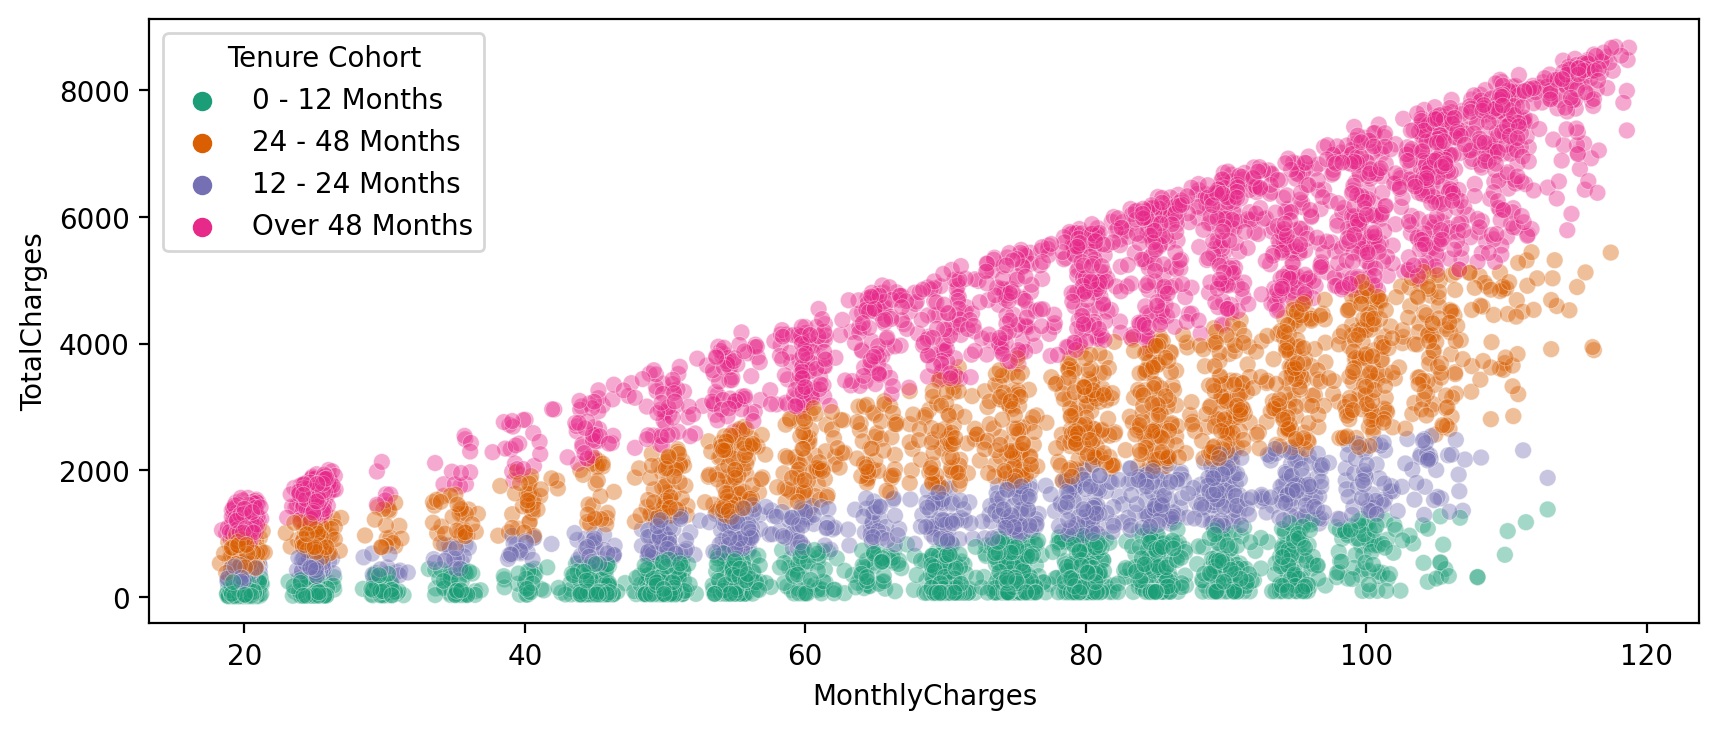

In [57]:
plt.figure(figsize = (10, 4), dpi = 200)
sns.scatterplot(data = df, x = 'MonthlyCharges', y = 'TotalCharges', hue = 'Tenure Cohort', alpha = 0.4, linewidth = 0.3, palette = 'Dark2')

Task: Create a count plot showing the churn count per cohort

<AxesSubplot:xlabel='Tenure Cohort', ylabel='count'>

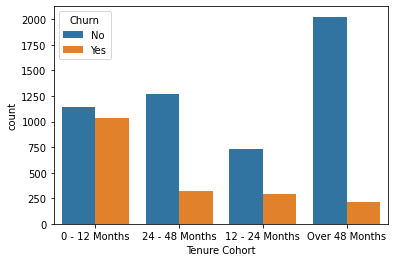

In [58]:
sns.countplot(data = df, x = 'Tenure Cohort', hue = 'Churn')

Task : Create a grid of count plots showing counts per tenure cohort, separated out by contract type and colored by the churn hue

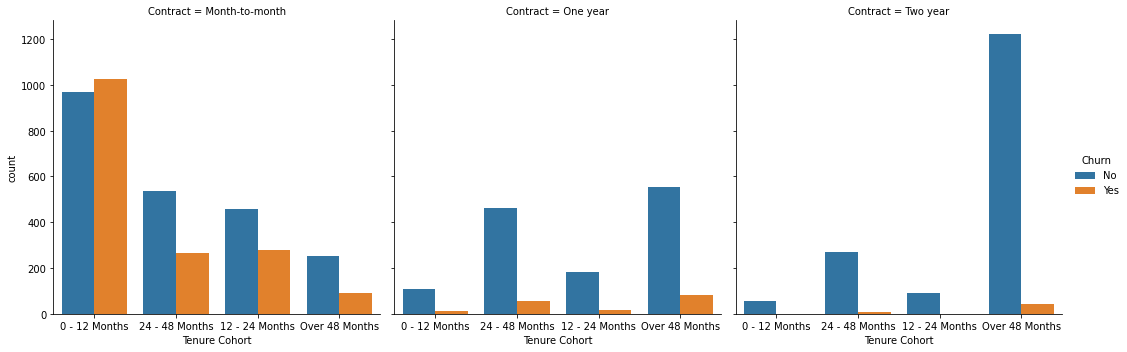

In [59]:
sns.catplot(data = df, x = 'Tenure Cohort', hue = 'Churn', kind = 'count', col = 'Contract')

## Part 4: Predictive Modelling ##

Task: Separate out the data into X features and Y label. Create dummy variables where necessary and note which features are not useful and should be dropped.

In [73]:
X = df.drop(['customerID', 'Churn'], axis = 1)

In [77]:
X = pd.get_dummies(X, drop_first = True)

In [78]:
y = df['Churn']

Task: Perfrom a train test split, holding out 10% of the data for testing. we will use a random_state of 101.

In [79]:
from sklearn.model_selection import train_test_split

In [80]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=101)

Task: Decision Tree performance. Complete the following tasks.

Task: 1) Train a single tree model

2) Evaluvate a performance metrics from decision tree, including classification report and plotting a confusion matrix.

3) Calculate feature importance from the decision tree

4) Plot your tree, notr the tree could be depending on your pruning, so it may crash your notebook if you display it with plot_tree

In [81]:
from sklearn.tree import DecisionTreeClassifier

In [83]:
dt = DecisionTreeClassifier(max_depth = 6)

In [84]:
dt.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=6)

In [85]:
from sklearn.metrics import plot_confusion_matrix, classification_report

In [86]:
preds = dt.predict(X_test)

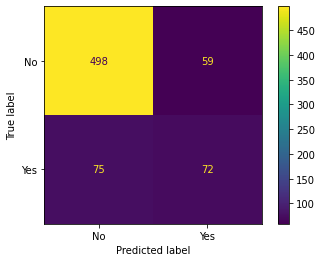

In [88]:
plot_confusion_matrix(dt,X_test,y_test)

In [87]:
print(classification_report(y_test, preds))

              precision    recall  f1-score   support

          No       0.87      0.89      0.88       557
         Yes       0.55      0.49      0.52       147

    accuracy                           0.81       704
   macro avg       0.71      0.69      0.70       704
weighted avg       0.80      0.81      0.81       704



In [95]:
imp_feats = pd.DataFrame(data = dt.feature_importances_,
                        index = X.columns,
                        columns = ['Feat Imp'])

In [97]:
imp_feats = imp_feats.sort_values('Feat Imp')

In [99]:
imp_feats = imp_feats[imp_feats['Feat Imp']>0]

In [100]:
imp_feats

,Feat Imp
MultipleLines_No phone service,0.000890
gender_Male,0.001237
OnlineBackup_Yes,0.005341
PhoneService_Yes,0.006962
TechSupport_Yes,0.007868
OnlineSecurity_Yes,0.008376
Contract_One year,0.010021
SeniorCitizen,0.010825
MultipleLines_Yes,0.012432
StreamingMovies_No internet service,0.026290


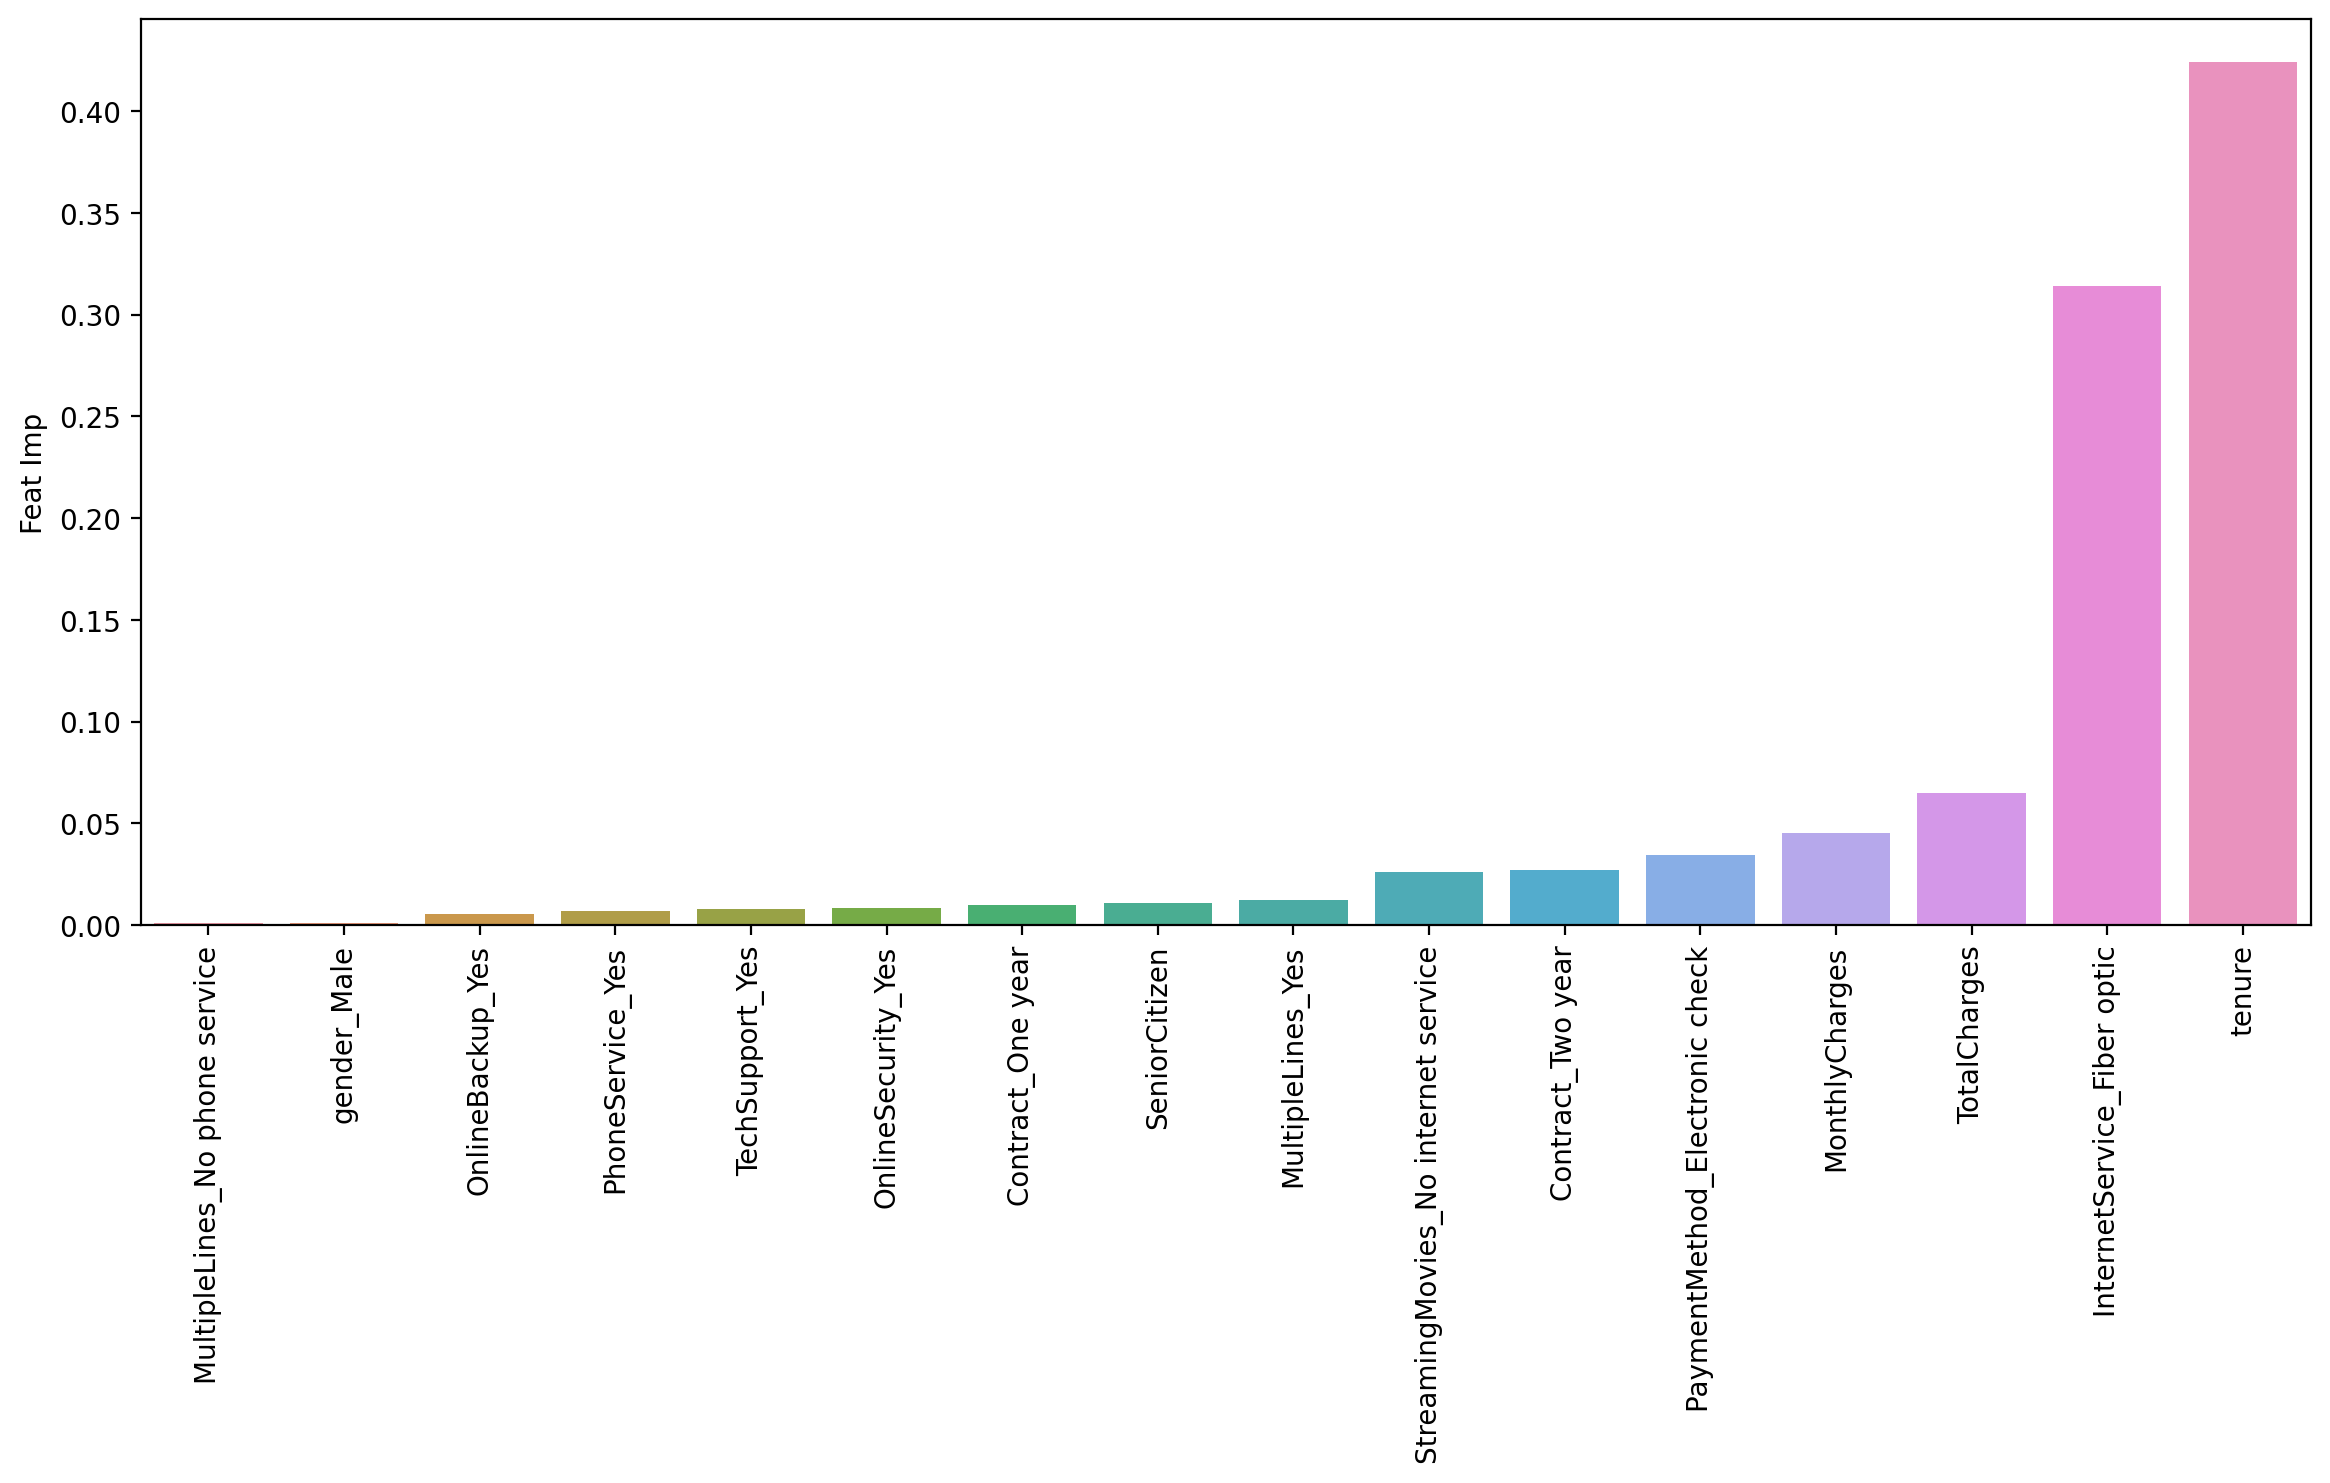

In [104]:
plt.figure(figsize = (14, 6), dpi = 200)
sns.barplot(data = imp_feats, x = imp_feats.index, y = 'Feat Imp')
plt.xticks(rotation =90);

In [105]:
from sklearn.tree import plot_tree

In [106]:
# plot_tree(dt)

## Random Forest ## 

Task: Create a arandom forst model and create a classification report and confusion matrix from its predicted results on the test set

In [107]:
from sklearn.ensemble import RandomForestClassifier

In [114]:
rf = RandomForestClassifier(max_depth=6)

In [115]:
rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=6)

In [116]:
preds = rf.predict(X_test)

In [117]:
from sklearn.metrics import classification_report, plot_confusion_matrix

In [118]:
print(classification_report(y_test, preds))

              precision    recall  f1-score   support

          No       0.87      0.93      0.90       557
         Yes       0.63      0.46      0.53       147

    accuracy                           0.83       704
   macro avg       0.75      0.69      0.71       704
weighted avg       0.82      0.83      0.82       704



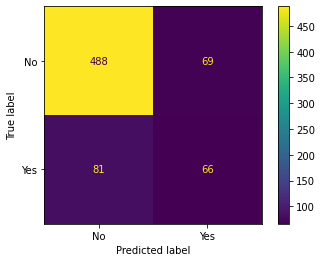

In [113]:
plot_confusion_matrix(rf, X_test, y_test)

## Boosted Trees ##

Task: Use Ada boost or Gradient Boosting to create a model and report back the classification report and plot a confusion matrix for its predicted results

In [120]:
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier

In [132]:
ada_model = AdaBoostClassifier(n_estimators=100)

In [133]:
gb_model = GradientBoostingClassifier()

In [134]:
ada_model.fit(X_train, y_train)

AdaBoostClassifier(n_estimators=100)

In [135]:
gb_model.fit(X_train, y_train)

GradientBoostingClassifier()

In [136]:
ada_preds = ada_model.predict(X_test)

In [137]:
gb_preds = gb_model.predict(X_test)

In [138]:
print(classification_report(y_test, ada_preds))

              precision    recall  f1-score   support

          No       0.88      0.92      0.90       557
         Yes       0.63      0.53      0.58       147

    accuracy                           0.84       704
   macro avg       0.76      0.72      0.74       704
weighted avg       0.83      0.84      0.83       704



In [139]:
print(classification_report(y_test, gb_preds))

              precision    recall  f1-score   support

          No       0.87      0.90      0.89       557
         Yes       0.57      0.50      0.53       147

    accuracy                           0.82       704
   macro avg       0.72      0.70      0.71       704
weighted avg       0.81      0.82      0.81       704



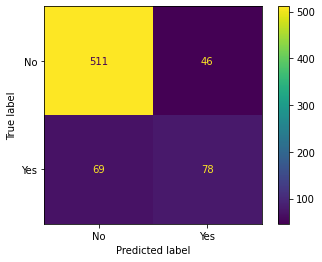

In [140]:
plot_confusion_matrix(ada_model, X_test, y_test)

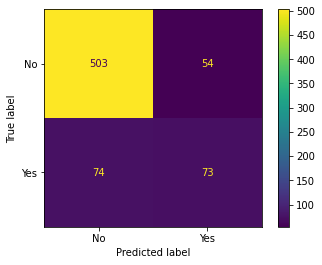

In [141]:
plot_confusion_matrix(gb_model, X_test, y_test)